In [18]:
import numpy as np
import pandas as pd
from umap import UMAP

import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc
palette = sns.color_palette(cc.glasbey, n_colors=25)

### Set seed

In [19]:
seed = 42
np.random.seed(seed)

### Load data

In [20]:
data_dir = '../data/'

In [21]:
# load GDSC data

gdsc_data_dir = data_dir + 'GDSC/GDSC_gex.csv'
gdsc_data_df = pd.read_csv(gdsc_data_dir, index_col=0)

gdsc_info_dir = data_dir + 'GDSC/GDSC_info.csv'
gdsc_info_df = pd.read_csv(gdsc_info_dir)

gdsc_data_df.shape, gdsc_info_df.shape

((673, 978), (673, 5))

In [22]:
# load labeled external data

external_labeled_data_dir = data_dir + 'External/External_labeled_gex.csv'
external_labeled_data_df = pd.read_csv(external_labeled_data_dir, index_col=0)

external_labeled_info_dir = data_dir + 'External/External_labeled_info.csv'
external_labeled_info_df = pd.read_csv(external_labeled_info_dir)

external_labeled_wgex_dir = data_dir + 'Alignment_results_External/External_labeled_alignment_wgex.csv'
external_labeled_wgex_df = pd.read_csv(external_labeled_wgex_dir, index_col=0)

external_labeled_data_df.shape, external_labeled_info_df.shape, external_labeled_wgex_df.shape

((179, 978), (179, 3), (179, 978))

### Tissue-specific data generation

In [23]:
tissue = 'breast'

In [24]:
# tissue-specific GDSC data

tissue_gdsc_info_df = gdsc_info_df[gdsc_info_df['tissue_type']==tissue].reset_index(drop=True)
tissue_gdsc_data_df = gdsc_data_df.loc[tissue_gdsc_info_df['ID']]

tissue_gdsc_data_df.shape, tissue_gdsc_info_df.shape

((45, 978), (45, 5))

In [30]:
# zero gene matching

zero_genes = external_labeled_data_df.T[external_labeled_data_df.sum() == 0].index.to_list()
for gene in zero_genes:
    tissue_gdsc_data_df[gene] = 0

### Figure 4. (a) External data embedding space

In [31]:
concat_df = pd.concat([external_labeled_data_df, external_labeled_wgex_df, tissue_gdsc_data_df])
concat_df.shape

(403, 978)

In [32]:
UMAP_reduction = UMAP(n_components=2, random_state=seed)
umap_df = pd.DataFrame(UMAP_reduction.fit_transform(concat_df))
umap_df['Data'] = ['External (before)']*len(external_labeled_data_df)+['External (after)']*len(external_labeled_wgex_df)+['GDSC (breast)']*len(tissue_gdsc_data_df)

/data/project/inyoung/anaconda3/envs/THERAPI_github/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


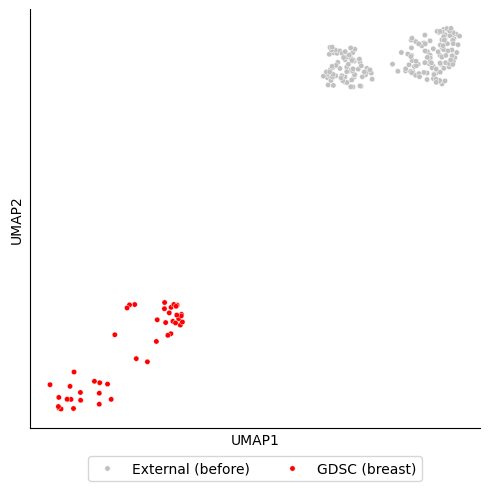

In [33]:
ump_original_df = umap_df[umap_df['Data']!='External (after)']
plt.figure(figsize=(5, 5))
sns.scatterplot(x=0, y=1, hue='Data', data=ump_original_df, s=15
, palette={'External (before)':'silver', 'GDSC (breast)':'r'})
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
sns.despine()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
plt.xticks([])
plt.yticks([])
plt.tight_layout()

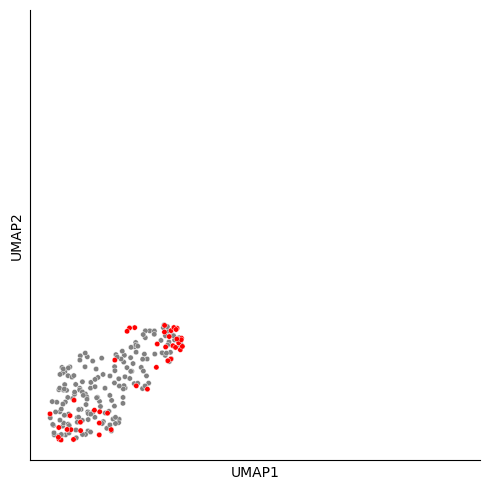

In [34]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x=0, y=1, hue='Data', data=umap_df, s=15
                , palette={'External (after)':'grey', 'External (before)':'white', 'GDSC (breast)':'r'})
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
sns.despine()
plt.gca().get_legend().remove()
plt.xticks([])
plt.yticks([])
plt.tight_layout()